In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test

In [9]:
def build_alexnet():
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(48, (3, 3), strides=(1, 1), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),
        layers.Conv2D(192, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(192, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [4]:
def train_model(model, x_train, y_train, x_test, y_test):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test), verbose=1)
    return history

In [5]:
def evaluate_and_visualize(model, x_test, y_test, class_names):
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f'Test accuracy: {test_accuracy:.4f}')

    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x_test[i])
        plt.title(f'True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}')
        plt.axis('off')
    plt.show()

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
x_train, y_train, x_test, y_test = load_and_preprocess_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [10]:
model = build_alexnet()

In [12]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("GPU Name: ", tf.config.list_physical_devices('GPU'))

Num GPUs Available:  0
GPU Name:  []


In [13]:
history = train_model(model, x_train, y_train, x_test, y_test)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 98s 245ms/step - accuracy: 0.6122 - loss: 1.1132 - val_accuracy: 0.5835 - val_loss: 1.2521
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 97s 247ms/step - accuracy: 0.6959 - loss: 0.8858 - val_accuracy: 0.6975 - val_loss: 0.8913
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 102s 260ms/step - accuracy: 0.7495 - loss: 0.7404 - val_accuracy: 0.6014 - val_loss: 1.2182
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 154s 393ms/step - accuracy: 0.7777 - loss: 0.6520 - val_accuracy: 0.7232 - val_loss: 0.8366
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 95s 243ms/step - accuracy: 0.8059 - loss: 0.5733 - val_accuracy: 0.6858 - val_loss: 0.9286
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 97s 248ms/step - accuracy: 0.8289 - loss: 0.5044 - val_accuracy: 0.6748 - val_loss: 0.9640
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 95s 242ms/step - accuracy: 0.8509 - loss: 0.4404 - val_accuracy: 0.7614 - val_loss: 0.8031
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 264ms/step - accuracy: 0.8650 - loss

Test accuracy: 0.7297
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


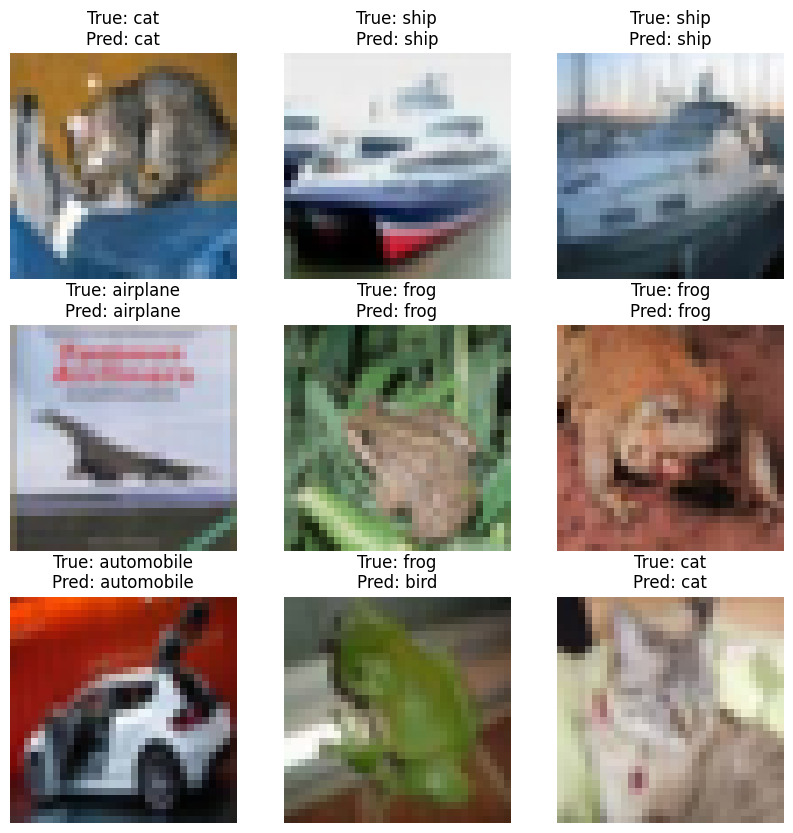

In [14]:
evaluate_and_visualize(model, x_test, y_test, class_names)